# Creating, reading and writing

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In [11]:
pd.DataFrame({'Stanislaw': ['Wow, such a thing', 'Awful'], 'Andrew': ['Such a cutie!', 'Bad']})

,Stanislaw,Andrew
0,"Wow, such a thing",Such a cutie!
1,Awful,Bad


In [12]:
pd.DataFrame({'Stanislaw': ['Wow, such a thing', 'Awful'], 'Andrew': ['Such a cutie!', 'Bad']}, ['Good mark', 'Bad mark'])

,Stanislaw,Andrew
Good mark,"Wow, such a thing",Such a cutie!
Bad mark,Awful,Bad


In [13]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [14]:
a = pd.Series([75, 70, 90], index=['16', '17', '18'])
b = pd.Series([23, 43, 54], index=['16', '17', '18'])
df = pd.DataFrame({
    'Sales': a,
    'Prod': b
})
df

,Sales,Prod
16,75,23
17,70,43
18,90,54


# Reading data

In [15]:
wine_reviews = pd.read_csv('data/winemag-data-130k.csv')
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [16]:
wine_reviews.shape

(129971, 14)

The **pd.read_csv()** function is well-endowed, with over 30 optional parameters you can specify. For example, you can see in this dataset that the CSV file has a built-in index, which pandas did not pick up on automatically. To make pandas use that column for the index (instead of creating a new one from scratch), we can specify an **index_col**.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'country'),
  Text(1, 0, 'description'),
  Text(2, 0, 'designation'),
  Text(3, 0, 'points'),
  Text(4, 0, 'price'),
  Text(5, 0, 'province'),
  Text(6, 0, 'region_1'),
  Text(7, 0, 'region_2'),
  Text(8, 0, 'taster_name'),
  Text(9, 0, 'taster_twitter_handle'),
  Text(10, 0, 'title'),
  Text(11, 0, 'variety'),
  Text(12, 0, 'winery')])

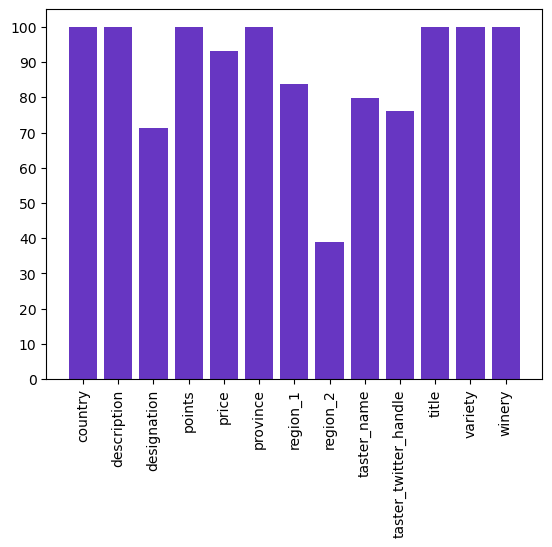

In [124]:
nas = wine_reviews.count().iloc[1:]
nas: pd.DataFrame = nas.apply(lambda x: float(f'{x / wine_reviews.shape[0] * 100:.1f}'))
plt.bar(nas.index.values, nas.values.T, color='#6736c2')
plt.yticks(np.arange(0, 100.1, 10))
plt.xticks(rotation=90)